/usr/local/lib/python3.8/dist-packages/toto-0.0.1-py3.8.egg/toto/core/cyclone_mask.py:142: RuntimeWarning: invalid value encountered in greater_equal
  self.cyclones['Cat_AustBOMWindSpeed']=sum(MaximumWindSpeed_m>=AustBOMWindSpeed_Limits_m)
/usr/local/lib/python3.8/dist-packages/toto-0.0.1-py3.8.egg/toto/core/cyclone_mask.py:149: RuntimeWarning: invalid value encountered in greater_equal
  self.cyclones['Cat_AustBOMPressure']=sum(Pressure_m>=AustBOMPressure_Limits_m)
/usr/local/lib/python3.8/dist-packages/toto-0.0.1-py3.8.egg/toto/core/cyclone_mask.py:155: RuntimeWarning: invalid value encountered in less
  within_radius=(dist<self.radius) & (self.cyclones['Cat_AustBOMWindSpeed']>self.min_cat)
/usr/local/lib/python3.8/dist-packages/toto-0.0.1-py3.8.egg/toto/core/cyclone_mask.py:165: RuntimeWarning: invalid value encountered in less
  within_radius=dist<self.radius


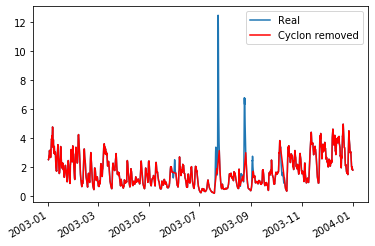

In [2]:
import pandas as pd
import toto
from toto.inputs.txt import TXTfile
from toto.core.cyclone_mask import Cyclone,binaries_directory
import os
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read a Txt file
filename=r'../_tests/txt_file/cyclones_115.3085_19.8892.txt'
tx=TXTfile([filename],\
           colNamesLine=1,\
           skiprows=1,\
           unitNamesLine=0,\
           time_col_name={'Year':'year','Month':'month','Day':'day','H[UTC]':'hour','Min':'Minute','Sec':'Second'})
tx.reads()
tx.read_time()
df=tx._toDataFrame()

# Time series location
lon=115.3085
lat=19.8892
# import Cyclone module
CYCLONE_FILE=os.path.join(binaries_directory(),'IBTrACS.ALL.v04r00.nc')
cy=Cyclone(cyclone_file=CYCLONE_FILE)
cy.min_cat=1 # Minimum category to use
cy.rmw=None # radius_of_tropical_cyclone_maximum_sustained_wind_speed if not set it will use radius in meters
cy.radius=500 # radius around the cente to mask in meter
cy.mask_before=12/24. # hours before a cyclone to mask
cy.mask_after=12/24. # hours after a cyclone to mask



# mask all timestep within cy.radius with cyclone above or equal the minimum category 
cy.limit_categories_within_radius([lon,lat]) 

# create the mask
msk=cy.remove_cyclones(df[0].index,[lon,lat])

# Apply the mask
df_no_cyclone=df[0].loc[~msk]

# Plot the results
fig, ax = plt.subplots(1)
ax.plot(df[0].index,df[0]['hs'],label='Real')
ax.plot(df_no_cyclone.index,df_no_cyclone['hs'],'r',label='Cyclone removed')
#plt.xlim(datetime.datetime(2010,11,1),datetime.datetime(2010,12,1))
plt.legend()
fig.autofmt_xdate()
plt.show()
